## Implementing Logistic regression using gradient descent
##### we will train my implementation logistic regression on bivariate datasets to visualise desicion boundries and the sigmoid function and compare the results with the sklearn implementation of logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

visualising the sigmoid function

In [2]:
def sigmoid(z):
    f=1/(1+np.exp(-z))
    return f

In [3]:
X=np.arange(-20,20,.5)
Y=sigmoid(X)
#axis 0: along the vertical
#axis 1: along the horizontal
#np.c_ returns a concatenated array along the appropraite axis
print(np.c_[X,Y])

[[-2.00000000e+01  2.06115362e-09]
 [-1.95000000e+01  3.39826781e-09]
 [-1.90000000e+01  5.60279641e-09]
 [-1.85000000e+01  9.23744958e-09]
 [-1.80000000e+01  1.52299795e-08]
 [-1.75000000e+01  2.51099909e-08]
 [-1.70000000e+01  4.13993755e-08]
 [-1.65000000e+01  6.82560291e-08]
 [-1.60000000e+01  1.12535162e-07]
 [-1.55000000e+01  1.85539102e-07]
 [-1.50000000e+01  3.05902227e-07]
 [-1.45000000e+01  5.04347408e-07]
 [-1.40000000e+01  8.31528028e-07]
 [-1.35000000e+01  1.37095721e-06]
 [-1.30000000e+01  2.26032430e-06]
 [-1.25000000e+01  3.72663928e-06]
 [-1.20000000e+01  6.14417460e-06]
 [-1.15000000e+01  1.01299910e-05]
 [-1.10000000e+01  1.67014218e-05]
 [-1.05000000e+01  2.75356911e-05]
 [-1.00000000e+01  4.53978687e-05]
 [-9.50000000e+00  7.48462275e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.50000000e+00  2.03426978e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.50000000e+00  5.52778637e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.50000000e+00  1.50118226e-03]
 [-6.00000000e+00  2

In [4]:
np.c_[np.array([1,2,3]), np.array([0, 0,0]), np.array([4,5,6])]

array([[1, 0, 4],
       [2, 0, 5],
       [3, 0, 6]])

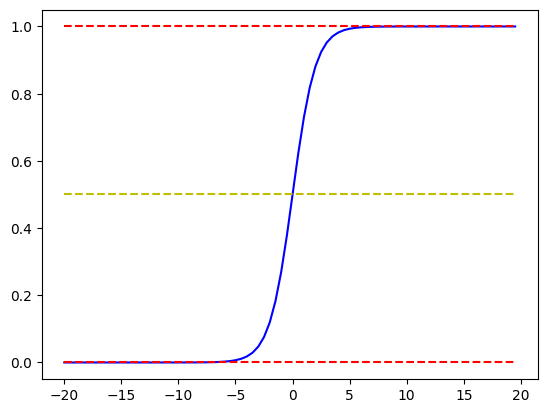

In [5]:
plt.plot(X,Y,'b-')
plt.plot(X,np.ones(X.shape),'r--')
plt.plot(X,np.zeros(X.shape),'r--')
plt.plot(X,np.full(X.shape,.5),'y--')
plt.show()

In [20]:
"""
The below function works very well for datasets with 2 or more input features but not for univariate datasets
"""

def train(X_train, Y_train):
    X_train=np.array(X_train,dtype=float)
    Y_train=np.array(Y_train,dtype=float)
    
    #never do feature scaling inside a function of a training algorithm, its a data preprossesing task

    row=X_train.shape[0]
    col=X_train.shape[1]
    Y_train=np.reshape(Y_train, (row, 1))
    X_train=np.insert(X_train,col,1,axis=1)
    
    #training the algorithm
    
    #1)initialise the bias_matrix, cost function, grad_matrix, learning rate, sigmoid matrix
    bias_matrix=np.zeros((col+1,1)) # a column matrix with col+1 num of rows
    """
    the sigmoid function returns a np array with 'm' values, each value representing the sigmoid of the dot product of 
    bias_matrix and the ith row of X_train
    """
    X_sig=sigmoid(np.matmul(X_train, bias_matrix))
    cost_func=-(np.sum(Y_train*np.log(X_sig)+(1-Y_train)*np.log(1-X_sig)))/row
    count=0
    grad_matrix=np.transpose(np.matmul(np.transpose(X_sig-Y_train),X_train)/row)
    diff=cost_func
    alpha=.3
    while (diff>.0001):
        """
        1)updating the bias matrix
        2)calculating X_sig: matrix containing the sigmoid of every datapoint
        3)calculate the cost_function
        4)update the gradient matrix
        5)update the diff
        """
        bias_matrix=bias_matrix-alpha*grad_matrix
        X_sig=sigmoid(np.matmul(X_train, bias_matrix))
        cost_func1=cost_func
        cost_func=-(np.sum(Y_train*np.log(X_sig)+(1-Y_train)*np.log(1-X_sig)))/row
        grad_matrix=np.transpose(np.matmul(np.transpose(X_sig-Y_train),X_train)/row)
        diff=np.abs(cost_func-cost_func1)
        plt.scatter(count, cost_func,s=10, c='r')
        count=count+1
    return bias_matrix

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [25]:
input_data=np.array(df.iloc[:,2:4], dtype=float)
target_data=np.array(df.iloc[:,4], dtype=float)
input_data1=input_data
#scaling the input dataset for efficient working of the algorithm

for i in range(2):
    mean=np.mean(input_data1[:,i])
    std_dev=np.std(input_data1[:,i])
    input_data1[:,i]=(input_data1[:,i]-mean)/std_dev
    
X_train, X_test, Y_train, Y_test=train_test_split(input_data1, target_data)
print(X_test.shape)
print(Y_train.shape)

(100, 2)
(300,)


1) training the logistic regression algorithm using a dataset with a single input feature

[[ 2.04980514]
 [ 1.2020538 ]
 [-0.91712899]]


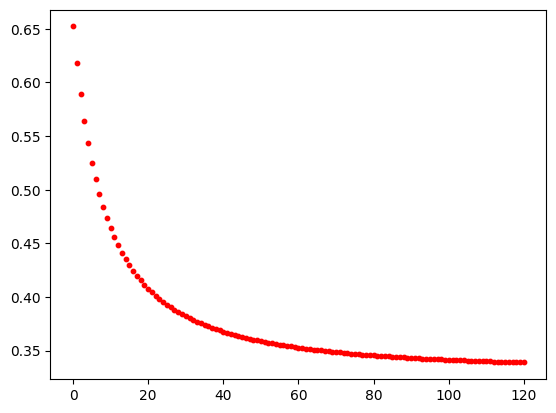

In [26]:
coeff_=(train(X_train, Y_train))
print(coeff_)
"""
The below graph shows the descent of the cost function with the number of iterations.
The gradual descent shows that the learning rate choosen is appropriate
"""

### plotting the desicion boundry in the plane of the 2 input parameters:
##### 1) on the training datset
##### 2) on the entire datset
##### 3) on the testing datset

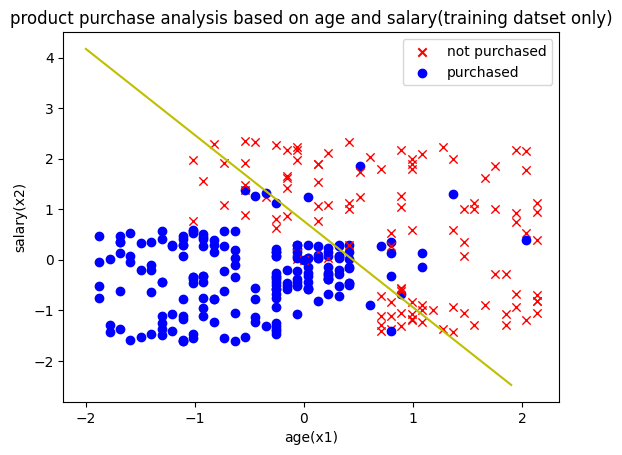

' any test datapoint lying exactly on this line will have a equal probability of being both types of data '

In [27]:
"""
note that it is very important to used scaled data while plotting, because the algorithm had found values of corresponding 
coeffcients according to the scaled values in the 'train' function
"""

#plotting the desicion boundry wrt the training data only first

plt.ylabel('salary(x2)')
plt.xlabel('age(x1)')
plt.title("product purchase analysis based on age and salary(training datset only)")

for i in range(1,300):
    if(Y_train[i]==0):
        plt.scatter(X_train[i,0], X_train[i,1], marker='o', color='b', linewidth=1)
    if(Y_train[i]==1):
        plt.scatter(X_train[i,0], X_train[i,1], marker='x', color='r', linewidth=1)
        
X2=np.arange(-2,2,.1,dtype=float)
plt.plot(X2, -(coeff_[0]*X2+coeff_[2])/coeff_[1], color='y')
plt.scatter(0,0,color='r',marker='x', label="not purchased")
plt.scatter(0,0,color='b',marker='o', label="purchased")
plt.legend()
plt.show()

""" any test datapoint lying exactly on this line will have an equal probability of being both types of data """

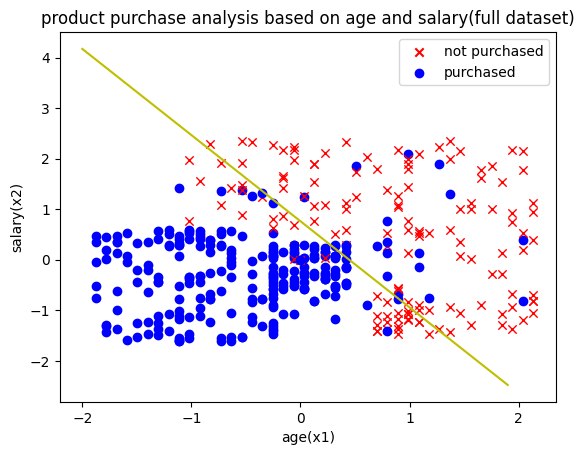

In [28]:
#plotting the desicion boundry wrt to the entire original dataset

plt.ylabel('salary(x2)')
plt.xlabel('age(x1)')
plt.title("product purchase analysis based on age and salary(full dataset)")

for i in range(1,400):
    if(target_data[i]==0):
        plt.scatter(input_data1[i,0], input_data1[i,1], marker='o', color='b', linewidth=1)
    if(target_data[i]==1):
        plt.scatter(input_data1[i,0], input_data1[i,1], marker='x', color='r', linewidth=1)
        
plt.plot(X2, -(coeff_[0]*X2+coeff_[2])/coeff_[1], color='y')
plt.scatter(0,0,color='r',marker='x', label="not purchased")
plt.scatter(0,0,color='b',marker='o', label="purchased")
plt.legend()
plt.show()

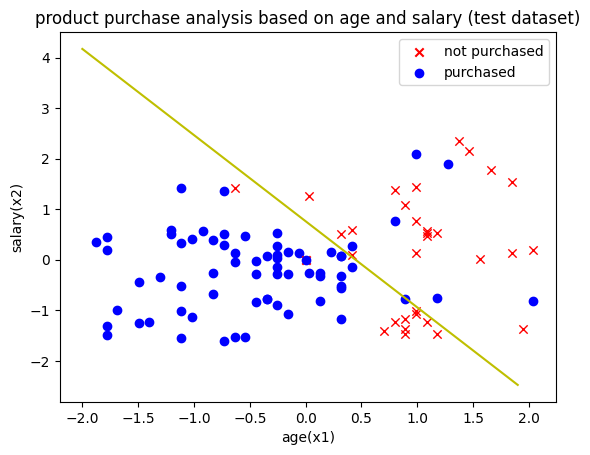

In [29]:
#plotting the desicion boundry wrt to the test dataset

plt.ylabel('salary(x2)')
plt.xlabel('age(x1)')
plt.title("product purchase analysis based on age and salary (test dataset)")

for i in range(1,100):
    if(Y_test[i]==0):
        plt.scatter(X_test[i,0], X_test[i,1], marker='o', color='b', linewidth=1)
    if(Y_test[i]==1):
        plt.scatter(X_test[i,0], X_test[i,1], marker='x', color='r', linewidth=1)
        
plt.plot(X2, -(coeff_[0]*X2+coeff_[2])/coeff_[1], color='y')
plt.scatter(0,0,color='r',marker='x', label="not purchased")
plt.scatter(0,0,color='b',marker='o', label="purchased")
plt.legend()
plt.show()

From the 3 plots given above it can be observed that logistic regression performs well enough on all three parts of the original dataset.

### ML dev stack functions discovered while making this notebook:

In [14]:
np.log(np.array([1,2,3]))
#returns an array contianing the natural log of all the elements in the input array

array([0.        , 0.69314718, 1.09861229])

In [16]:
a=np.reshape(np.array([1,2,3,4]),(4,1))
print(a.shape)
#reshaping a row matrix to a column matrix

(4, 1)


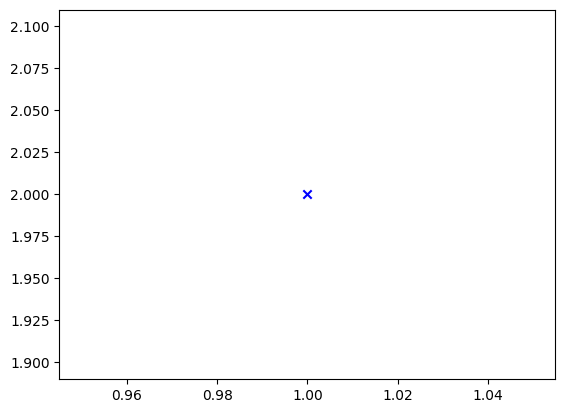

In [17]:
plt.scatter(1,2,color='b', marker='x')
#the marker attribute of the plt.scatter method